In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
presnap_2022 = pd.read_csv("SIS_NCAAF_Presnap_Offense_Sample_2022_Week1.csv")
participation_2022 = pd.read_csv("SIS_NCAAF_Participation_Offense_Sample_2022_Week1.csv")
plays_2022 = pd.read_csv("SIS_NCAAF_Events_Sample_2022_Week1.csv")
print(presnap_2022)
print(participation_2022)
print(plays_2022)

       season  week  gameId  eventId  teamId  qb  rb  wr  te  ol  ...  \
0        2022     1    6222       10       3   1   1   3   1   5  ...   
1        2022     1    6222       15       3   1   1   3   1   5  ...   
2        2022     1    6222       20       3   1   1   3   1   5  ...   
3        2022     1    6222       25       3   1   1   3   1   5  ...   
4        2022     1    6222       30       3   1   1   3   1   5  ...   
...       ...   ...     ...      ...     ...  ..  ..  ..  ..  ..  ...   
11556    2022     1    6268      915      26   1   1   2   2   5  ...   
11557    2022     1    6268      920      26   1   1   2   2   5  ...   
11558    2022     1    6268      925      26   1   1   2   2   5  ...   
11559    2022     1    6268      930      26   1   1   1   3   5  ...   
11560    2022     1    6269       10     182   1   1   2   2   5  ...   

       abortedSnap  snapper  playAction  readOption  backFormation  \
0            False        0       False       False  

In [4]:
presnap_2022.columns

Index(['season', 'week', 'gameId', 'eventId', 'teamId', 'qb', 'rb', 'wr', 'te',
       'ol', 'blockingSchemeType', 'blownBlockPlayer', 'blownBlockPlayer2',
       'blownBlockPlayer3', 'shotgun', 'noHuddle', 'abortedSnap', 'snapper',
       'playAction', 'readOption', 'backFormation', 'receiverFormation',
       'formationCode', 'lastUpdate', 'badSnap', 'badCatch'],
      dtype='object')

In [5]:
participation_2022.columns

Index(['season', 'week', 'gameId', 'eventId', 'playerId', 'playerName',
       'positionCategory', 'positionSubCategory', 'sideOfCenter', 'listOrder',
       'isBlocking', 'isInMotion', 'routeType', 'routeName', 'motionType',
       'lastUpdate', 'isOnBall', 'cutBlock', 'pullType'],
      dtype='object')

In [6]:
plays_2022.columns

Index(['season', 'week', 'gameId', 'eventId', 'eventType', 'offensiveTeamId',
       'defensiveTeamId', 'quarter', 'down', 'toGo', 'timeLeft', 'driveId',
       'fieldPos', 'hash', 'homeTeamId', 'awayTeamId', 'homeTeamScore',
       'awayTeamScore', 'scoreGap', 'scoreType', 'huddle', 'snap',
       'stoppedClock', 'homeTeamTimeoutsLeft', 'awayTeamTimeoutsLeft',
       'homeTeamChallengesLeft', 'awayTeamChallengesLeft', 'challengeType',
       'startYard', 'offensivePenalty', 'offensivePenaltyType',
       'offensivePenaltyPlayer', 'drewOffensivePenaltyPlayer',
       'offensivePenaltyDeclined', 'offensivePenaltyYardsGained',
       'defensivePenalty', 'defensivePenaltyType', 'defensivePenaltyPlayer',
       'defensivePenaltyDeclined', 'defensivePenaltyYardsGained',
       'defensivePenaltyYardsSpot', 'offensivePenaltyYardsSpot',
       'officialYardageAdjustment', 'playType', 'firstDown', 'fieldGoal',
       'touchdown', 'extraPoint', 'twoPtConversion', 'twoPtReturn', 'safety',
       

### Defining the Formations

In [7]:
back_formations = {
    1: "Empty Back",
    2: "Split Backs",
    3: "I Formation",
    4: "xOffset I - Do Not Use",
    5: "Full House",
    6: "xTE Flex Wing - Do Not Use",
    7: "Single Back",
    8: "Other",
    9: "Fake Field Goal",
    10: "Fake Punt",
    11: "Pistol",
    12: "xWildcat - Do Not Use",
    13: "xPistol 2-Back - Do Not Use",
    14: "Pistol 3-Back",
    15: "xTE Flex Wing 2-Back-Do Not Select",
    16: "Aborted Field Goal",
    17: "Aborted Punt",
    18: "Wing Right",
    19: "Wing Left",
    20: "Double Wing",
    21: "Gun Offset Left",
    22: "Gun Offset Right",
    23: "Offset I Left",
    24: "Offset I Right",
    25: "Pistol 2-Back Left",
    26: "Pistol 2-Back Right",
    27: "Go-Go",
    28: "RB Left - Sniffer Left",
    29: "RB Left - Sniffer Right",
    30: "RB Right - Sniffer Left",
    31: "RB Right - Sniffer Right",
    32: "Wildcat Empty",
    33: "Wildcat 1-Back Left",
    34: "Wildcat 1-Back Right",
    35: "Wildcat 2-Back",
    36: "Wildcat 3-Back",
    37: "No Video",
    38: "Kneel Down",
    39: "Wildcat Pistol",
    40: "Wildcat Singleback",
    41: "Pistol 2-Back I Form",
    42: "Pistol 3-Back I Form"
}

In [1]:
receiver_formations = {
    1: "Single Left",
    2: "Single Right",
    3: "Twin Left",
    4: "Twin Right",
    5: "Trips Left",
    6: "Trips Right",
    7: "Bunch Left",
    8: "Bunch Right",
    9: "Spread",
    10: "Slot Left",
    11: "Slot Right",
    12: "Slot Tight Left",
    13: "Slot Tight Right",
    14: "Goal Line",
    15: "Other",
    16: "Balanced",
    17: "Fake Field Goal",
    18: "Fake Punt",
    19: "All Tight",
    20: "Quads Left",
    21: "Quads Right",
    22: "Aborted Field Goal",
    23: "Aborted Punt",
    24: "No Video",
}

In [3]:
# Merge hash from plays_2022 into presnap_2022
presnap_2022 = presnap_2022.merge(
    plays_2022[['gameId', 'eventId', 'hash']],
    on=['gameId', 'eventId'],
    how='left' 
)

In [4]:
# indicating motion by position

participation_2022["wr_motion"] = (participation_2022["isInMotion"]) & (
    participation_2022["positionCategory"].isin(["WR", "SWR"])
)

participation_2022["te_motion"] = (participation_2022["isInMotion"]) & (
    participation_2022["positionCategory"] == "TE"
)

participation_2022["rb_motion"] = (participation_2022["isInMotion"]) & (
    participation_2022["positionCategory"].str.startswith("B")
)

motion_flags = (
    participation_2022
    .groupby(["gameId", "eventId"])[["wr_motion", "te_motion", "rb_motion"]]
    .any()
    .reset_index()
)

presnap_2022 = presnap_2022.merge(
    motion_flags,
    how="left",
    on=["gameId", "eventId"]
)

presnap_2022[["wr_motion", "te_motion", "rb_motion"]] = presnap_2022[
    ["wr_motion", "te_motion", "rb_motion"]
].fillna(False)

presnap_2022.head()

,season,week,gameId,eventId,teamId,qb,rb,wr,te,ol,...,backFormation,receiverFormation,formationCode,lastUpdate,badSnap,badCatch,hash,wr_motion,te_motion,rb_motion
0,2022,1,6222,10,3,1,1,3,1,5,...,22,5,120010,2022-09-03T22:00:09.2,False,False,3,False,False,False
1,2022,1,6222,15,3,1,1,3,1,5,...,21,5,120001,2022-09-09T00:00:13.1,True,False,1,False,False,False
2,2022,1,6222,20,3,1,1,3,1,5,...,21,16,110011,2022-09-09T00:00:13.1,False,False,1,False,False,False
3,2022,1,6222,25,3,1,1,3,1,5,...,21,11,010111,2022-09-03T04:00:07.453,False,False,1,False,False,False
4,2022,1,6222,30,3,1,1,3,1,5,...,21,11,100111,2022-09-03T22:00:09.2,False,False,1,False,False,False


In [24]:
print(presnap_2022['formationCode'].unique())

['120010' '120001' '110011' '010111' '100111' '011011' '110021' 'NV'
 '001021' '102010' '110010' '101101' '100101' '111001' '111010' '001111'
 '110101' '100021' '110110' '020110' '030001' '111011' '201001' '120100'
 '112000' '200110' '102001' '100201' '010021' '200200' '110111' '101011'
 '010011' '010120' '020020' '011002' '100120' '001011' '002002' '011101'
 '010210' '001012' '120011' '100210' '100102' '201010' '111100' '100300'
 '100003' '000001' '000002' '001001' '010010' '200000' '101110' '000011'
 '010110' '020010' '101002' '110100' '000111' '010001' '020001' '003001'
 '120020' '010300' '001200' '200011' '002101' '001110' '000121' '011200'
 '110001' '021010' '011010' '020000' '100001' '010020' '020101' '001000'
 '020011' '110000' '101100' '012010' '121000' '010030' '100011' '111000'
 '001100' '011020' '100031' '030010' '101021' '010101' '011110' '101001'
 '110020' '012100' 'KD' '300001' '002011' '001300' '003100' '110002'
 '001002' '110200' '020200' '020021' '000220' '211000' '000

In [5]:
def safe_formationCode_split(code):
    try:
        code_str = str(int(code)).zfill(6)  # ensure numeric, then pad to 6 digits if needed
        return pd.Series(list(code_str)).astype(int)
    except:
        return pd.Series([np.nan]*6) # if not numeric, store nan for 6 new varaibles below

presnap_2022[['wide_left', 'slot_left', 'tight_left', 'tight_right', 'slot_right', 'wide_right']] = presnap_2022['formationCode'].apply(safe_formationCode_split)
presnap_2022.dropna(subset=['wide_left', 'slot_left', 'tight_left', 'tight_right', 'slot_right', 'wide_right'], inplace=True)

In [6]:
formation_definers = [
    'season',
    'week',
    'gameId',
    'eventId',
    'teamId',
    'qb',
    'rb',
    'wr',
    'te',
    'ol',
    'shotgun',
    'backFormation',
    'receiverFormation',
    'formationCode',
    'wide_left',
    'slot_left',
    'tight_left',
    'tight_right',
    'slot_right',
    'wide_right',
    'hash',
    'noHuddle',
    'wr_motion',
    'rb_motion',
    'te_motion'
]

formations = presnap_2022[formation_definers]

In [7]:
def assign_personnel(row):
    if row['rb'] == 1 and row['te'] == 0:
        return '10'
    elif row['rb'] == 1 and row['te'] == 1:
        return '11'
    elif row['rb'] == 1 and row['te'] == 2:
        return '12'
    elif row['rb'] == 1 and row['te'] == 3:
        return '13'
    elif row['rb'] == 2 and row['te'] == 0:
        return '20'
    elif row['rb'] == 2 and row['te'] == 1:
        return '21'
    elif row['rb'] == 2 and row['te'] == 2:
        return '22'
    elif row['rb'] == 0 and row['te'] == 0:
        return '00'
    elif row['rb'] == 2 and row['te'] == 3:
        return '23'
    elif row['rb'] == 0 and row['te'] == 1:
        return '01'
    elif row['rb'] == 0 and row['te'] == 2:
        return '02'
    elif row['rb'] == 0 and row['te'] == 3:
        return '03'
    elif row['rb'] == 0 and row['te'] == 4:
        return '04'
    elif row['rb'] == 3 and row['te'] == 0:
        return '30'
    elif row['rb'] == 3 and row['te'] == 1:
        return '31'
    elif row['rb'] == 3 and row['te'] == 2:
        return '32'
    else:
        return 'Other'

formations['personnel'] = formations.apply(assign_personnel, axis=1)

print(formations)

       season  week  gameId  eventId  teamId  qb  rb  wr  te  ol  ...  \
0        2022     1    6222       10       3   1   1   3   1   5  ...   
1        2022     1    6222       15       3   1   1   3   1   5  ...   
2        2022     1    6222       20       3   1   1   3   1   5  ...   
3        2022     1    6222       25       3   1   1   3   1   5  ...   
4        2022     1    6222       30       3   1   1   3   1   5  ...   
...       ...   ...     ...      ...     ...  ..  ..  ..  ..  ..  ...   
11555    2022     1    6268      905      26   1   1   2   2   5  ...   
11556    2022     1    6268      915      26   1   1   2   2   5  ...   
11557    2022     1    6268      920      26   1   1   2   2   5  ...   
11558    2022     1    6268      925      26   1   1   2   2   5  ...   
11560    2022     1    6269       10     182   1   1   2   2   5  ...   

       tight_left  tight_right  slot_right wide_right  hash  noHuddle  \
0             0.0          0.0         1.0        

C:\Users\lehma\AppData\Local\Temp\ipykernel_33740\805820951.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formations['personnel'] = formations.apply(assign_personnel, axis=1)


In [638]:
# counting number of formations
group_cols = [col for col in formation_definers if col != 'hash'] + ['personnel']

formation_counts = formations.groupby(group_cols).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(formation_counts)

       season  week  gameId  eventId  teamId  qb  rb  wr  te  ol  ...  \
0        2022     1    6222       10       3   1   1   3   1   5  ...   
7507     2022     1    6277      660      13   1   2   2   1   5  ...   
7499     2022     1    6277      585      59   1   1   2   2   5  ...   
7500     2022     1    6277      590      59   1   1   3   1   5  ...   
7501     2022     1    6277      595      59   1   1   3   1   5  ...   
...       ...   ...     ...      ...     ...  ..  ..  ..  ..  ..  ...   
3753     2022     1    6249      345      91   1   1   2   2   5  ...   
3754     2022     1    6249      350      91   1   1   2   2   5  ...   
3755     2022     1    6249      355      91   1   1   2   2   5  ...   
3756     2022     1    6249      360      91   1   1   3   1   5  ...   
11254    2022     1    7056      860     157   1   1   3   1   5  ...   

       tight_left  tight_right  slot_right wide_right  noHuddle  wr_motion  \
0             0.0          0.0         1.0   

In [639]:
formation_counts.to_csv('formation_counts.csv', index=False)

In [9]:
# Drop duplicates based on all columns except 'hash'
formations = formations.drop(['season', 'week', 'gameId', 'eventId', 'teamId'], axis=1)
formations = formations.drop_duplicates(subset=[col for col in formations.columns if col != 'hash'])
print(len(formations))

3000


In [641]:
personnel_counts = formations['personnel'].value_counts(dropna=False)
print(personnel_counts)

personnel
11       1130
12        889
21        339
10        212
13         95
20         94
22         89
31         41
30         39
01         21
00         18
02         17
23         10
03          3
32          2
Other       1
Name: count, dtype: int64


In [642]:
formation_counts_by_personnel = formation_counts.groupby('personnel')['count'].sum().reset_index(name='play_count')
personnel_counts_df = personnel_counts.reset_index(name='unique_formation_count')
personnel_counts_df = personnel_counts_df.merge(formation_counts_by_personnel, on='personnel', how='left')

print(personnel_counts_df)

   personnel  unique_formation_count  play_count
0         11                    1130        6819
1         12                     889        2290
2         21                     339         467
3         10                     212         976
4         13                      95         117
5         20                      94         203
6         22                      89         126
7         31                      41          53
8         30                      39          87
9         01                      21          35
10        00                      18          43
11        02                      17          17
12        23                      10          14
13        03                       3           3
14        32                       2           2
15     Other                       1           3


In [643]:
personnel_counts_df.to_csv('personnel_counts.csv', index=True)

In [75]:
# replacing receiverFormation with boolean flags
formations['has_twins'] = formations['receiverFormation'].isin([3, 4]).astype(int)
formations['has_trips'] = formations['receiverFormation'].isin([5, 6]).astype(int)
formations['has_bunch'] = formations['receiverFormation'].isin([7, 8]).astype(int)
formations['has_quads'] = formations['receiverFormation'].isin([20, 21]).astype(int)
formations['has_tight_slot'] = formations['receiverFormation'].isin([12, 13]).astype(int)
formations['is_all_tight'] = (formations['receiverFormation'] == 19).astype(int)
formations['is_goal_line'] = (formations['receiverFormation'] == 14).astype(int)
formations['is_fake_or_aborted_fg_or_punt'] = formations['receiverFormation'].isin([17, 18, 22, 23]).astype(int)

# replacing backFormation with boolean flags to reduce feature density
formations['empty_back'] = (formations['receiverFormation'] == 1).astype(int)
formations['split_backs'] = (formations['receiverFormation'] == 2).astype(int)
formations['Iform'] = formations['receiverFormation'].isin([3, 23, 24]).astype(int)
formations['full_house_backfield'] = (formations['receiverFormation'] == 5).astype(int)
formations['singleback'] = (formations['receiverFormation'] == 7).astype(int)
formations['pistol'] = formations['receiverFormation'].isin([11, 14, 25, 26, 41, 42]).astype(int)
formations['wildcat'] = formations['receiverFormation'].isin([32, 33, 34, 35, 36, 39, 40]).astype(int)
formations['wing'] = formations['receiverFormation'].isin([18, 19, 20]).astype(int)
formations['shotgun_rb'] = formations['receiverFormation'].isin([21, 22, 27]).astype(int)
formations['sniffer'] = formations['receiverFormation'].isin([28, 29, 30, 31]).astype(int)

formations['receivers_left'] = formations['wide_left'] + formations['slot_left']
formations['receivers_right'] = formations['wide_right'] + formations['slot_right']

formations['heavy'] = (formations['rb'] + formations['te'] >= 4)

formations['empty_backfield'] = (formations['rb'] == 0)

# Sum all alignment-based variables
align_vars = ['wide_left', 'slot_left', 'tight_left', 'tight_right', 'slot_right', 'wide_right']
formations['total_aligned'] = formations[align_vars].sum(axis=1)
formations['total_skill'] = formations['rb'] + formations['wr'] + formations['te']

# True if all skill players are aligned and there’s at least one RB
formations['rb_split'] = (formations['rb'] > 0) & (formations['total_aligned'] == formations['total_skill'])

formations.drop(columns=['total_aligned', 'total_skill'], inplace=True)

formations['te_split'] = (
    (formations['te'] > 0) & 
    ((formations['tight_left'] + formations['tight_right']) == 0)
)

formations['special'] = (
    (formations['qb'] == 0) &
    (formations['rb'] == 0) &
    (formations['wr'] == 0) &
    (formations['te'] == 0)
)

# Define what constitutes a 'special' formation
formations["special"] = (
    (formations["special"] == 1) | 
    (formations['is_fake_or_aborted_fg_or_punt'] == 1) |
    (formations["backFormation"].isin([9, 10, 16, 17, 38]))
).astype(int)

# receivers on short side of field

left_receivers = ['wide_left', 'slot_left', 'tight_left']
right_receivers = ['wide_right', 'slot_right', 'tight_right']

formations['receivers_on_short_side'] = (
    formations.apply(
        lambda row: row[left_receivers].sum() if row['hash'] == 1 
        else (row[right_receivers].sum() if row['hash'] == 3 else 0),
        axis=1
    )
)

formations['spread_index'] = formations['wide_left'] + formations['slot_left'] + formations['slot_right'] + formations['wide_right']

formations['te_spread_index'] = formations['te'] * formations['spread_index']

formations['rb_spread_index'] = formations['rb'] * formations['spread_index']

formations['heavy_index'] = formations['rb'] + formations['te']

formations['te_heavy_index'] = formations['te'] * formations['heavy_index']

formations['tight_balance'] = formations['tight_right'] - formations['tight_left']

formations['spread_balance'] = (
    formations['wide_right'] + formations['slot_right'] + formations['tight_right']
    - formations['wide_left'] - formations['slot_left'] - formations['tight_left']
)

formations['motion_load'] = (
    formations['rb_motion'].astype(int) +
    formations['te_motion'].astype(int) +
    formations['wr_motion'].astype(int)
)

formations['fake_empty'] = (formations['empty_backfield'] == True) & (formations['rb_motion'] != 0)

formations['empty_backfield_on_hash'] = (
    formations['empty_backfield'] & formations['hash'].isin([1, 3])
).fillna(False)

formations['wr_motion_toward_short_side'] = formations['wr_motion'] * formations['receivers_on_short_side']
formations['te_motion_toward_short_side'] = formations['te_motion'] * formations['receivers_on_short_side']

formations['wr_compressed'] = (formations['wr'] > 3) & (formations['spread_index'] < 2)

formations['noHuddle_spread_index'] = formations['noHuddle'] * formations['spread_index']

formations['shotgun_when_spread'] = formations['shotgun'] * formations['spread_index']

formations['wr_spread_index'] = formations['wr'] * formations['spread_index']

formations['false_heavy'] = (formations['heavy_index'] > 2) & (formations['spread_index'] > 2)

formations['noHuddle_heavy_index'] = formations['noHuddle'] * formations['heavy_index']

formations['rb_heavy_index'] = formations['rb'] * formations['heavy_index']

formations['spread_and_heavy'] = formations['spread_index'] * formations['heavy_index']

formations['shotgun_when_heavy'] = formations['shotgun'] * formations['heavy_index']

formations['spread_versus_tight_balance'] = formations['tight_balance'] * formations['spread_balance']

formations['motion_and_balance'] = (formations['motion_load'] * formations['spread_balance']).abs()

formations['motion_and_tight'] = abs(formations['motion_load'] * formations['tight_balance'])

formations['motion_and_spread'] = formations['spread_index'] * formations['motion_load']

formations['te_split_balance'] = (formations['te_split'] * formations['spread_balance']).abs()

formations['motion_heaviness_ratio'] = formations['motion_load'] * formations['heavy_index']

formations['motion_spread_ratio'] = formations['wr_motion'] * formations['spread_index']

formations['formation_entropy'] = formations['motion_load'] * (1 + formations['spread_index']) * (formations['noHuddle'] + 1)

def count_empty_wide_side_zones(row):
    if row['hash'] == 1:  # Ball on left hash → wide side is RIGHT
        return sum([
            row['wide_right'] == 0,
            row['slot_right'] == 0,
            row['tight_right'] == 0
        ])
    elif row['hash'] == 3:  # Ball on right hash → wide side is LEFT
        return sum([
            row['wide_left'] == 0,
            row['slot_left'] == 0,
            row['tight_left'] == 0
        ])
    else:  # Middle hash
        return 0

formations['empty_zones_on_wide_side'] = formations.apply(count_empty_wide_side_zones, axis=1)

hash_map = {1: 0.0, 2: 0.5, 3: 1.0} # normalize variable hash
formations['hash_spot'] = formations['hash'].map(hash_map)
formations['hash_spot'] = formations['hash_spot'].fillna(0.5)

# How much of the formation imbalance is toward wide or tight side of field?
# Positive value means imbalance toward wide side; negative is toward tight side

formations['field_mismatch'] = formations['spread_balance'] * (0.5 - formations['hash_spot'])
formations = formations.drop(columns=['hash_spot'])

In [76]:
nan_counts_per_feature = formations.isna().sum()
print(nan_counts_per_feature)

qb                     0
rb                     0
wr                     0
te                     0
ol                     0
                      ..
sniffer                0
has_bunch              0
receivers_left         0
receivers_receivers    0
receivers_right        0
Length: 79, dtype: int64


In [73]:
print(formations)

       qb  rb  wr  te  ol  shotgun  backFormation  receiverFormation  \
0       1   1   3   1   5     True             22                  5   
1       1   1   3   1   5     True             21                  5   
2       1   1   3   1   5     True             21                 16   
3       1   1   3   1   5     True             21                 11   
4       1   1   3   1   5     True             21                 11   
...    ..  ..  ..  ..  ..      ...            ...                ...   
11535   1   1   3   1   5    False              7                  2   
11538   1   1   3   1   5    False              7                 19   
11542   1   1   3   1   5     True             21                 11   
11554   1   1   1   3   5    False             24                  1   
11557   1   1   2   2   5    False              7                  2   

      formationCode  wide_left  ...  full_house_backfield  singleback  pistol  \
0            120010        1.0  ...                   

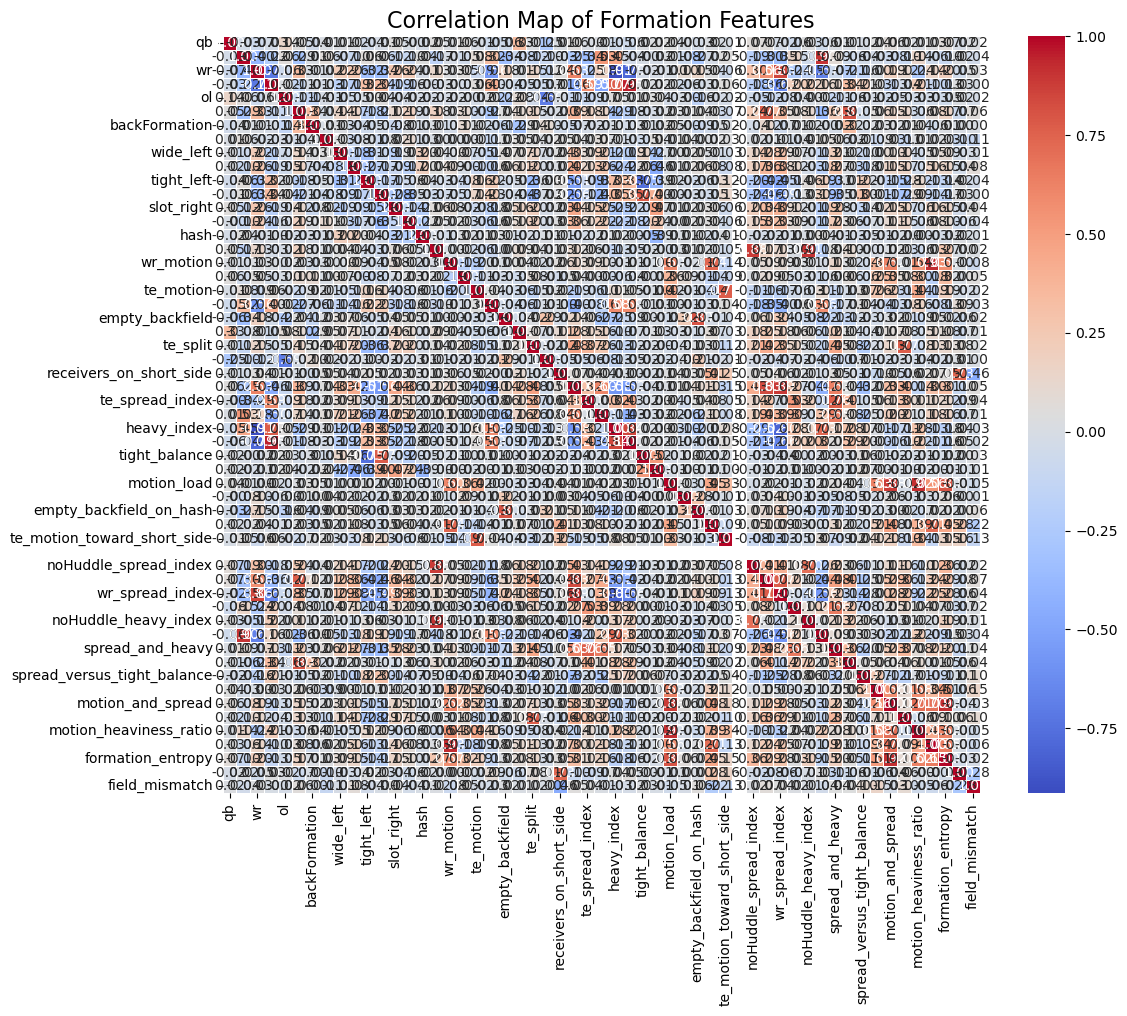

In [49]:
formations_numeric = formations.select_dtypes(include=["number", "bool"])

corr_matrix = formations_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)

plt.title("Correlation Map of Formation Features", fontsize=16)
plt.tight_layout()
plt.show()

In [77]:
formations.to_csv('formations_df_for_clustering.csv', index=False)

# Cluster Testing (Messy Drafts -- Disregard)

In [537]:
categorical_features = [
    'backFormation',
    'receiverFormation',
    'hash',
    'personnel',
]

boolean_features = [
    'shotgun',
    'noHuddle',
    'wr_motion',
    'te_motion',
    'rb_motion',
    'heavy',
    'empty_backfield',
    'rb_split',
    'te_split',
    'special'
]

features_to_scale = [
    'qb',
    'rb',
    'te',
    'wr',
    'ol',
    'wide_left',
    'slot_left',
    'tight_left',
    'tight_right',
    'slot_right',
    'wide_right',
    'receivers_on_short_side',
    'spread_index',
    'te_spread_index',
    'rb_spread_index',
    'heavy_index',
    'te_heavy_index',
    'tight_balance',
    'spread_balance',
    'motion_load',
    'motion_heaviness_ratio',
    'motion_spread_ratio',
    'field_mismatch'
]

In [566]:
from sklearn.preprocessing import StandardScaler

X = formations.copy()
X['personnel'] = X['personnel'].replace('Other', '99')
X = X.drop(columns='formationCode')

X[boolean_features] = X[boolean_features].astype(int)
#X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

In [539]:
X.columns

Index(['qb', 'rb', 'wr', 'te', 'ol', 'shotgun', 'wide_left', 'slot_left',
       'tight_left', 'tight_right', 'slot_right', 'wide_right', 'noHuddle',
       'wr_motion', 'rb_motion', 'te_motion', 'heavy', 'empty_backfield',
       'rb_split', 'te_split', 'special', 'receivers_on_short_side',
       'spread_index', 'te_spread_index', 'rb_spread_index', 'heavy_index',
       'te_heavy_index', 'tight_balance', 'spread_balance', 'motion_load',
       'motion_heaviness_ratio', 'motion_spread_ratio', 'field_mismatch',
       'backFormation_2', 'backFormation_3', 'backFormation_5',
       'backFormation_7', 'backFormation_8', 'backFormation_11',
       'backFormation_14', 'backFormation_18', 'backFormation_19',
       'backFormation_20', 'backFormation_21', 'backFormation_22',
       'backFormation_23', 'backFormation_24', 'backFormation_25',
       'backFormation_26', 'backFormation_27', 'backFormation_28',
       'backFormation_29', 'backFormation_30', 'backFormation_31',
       'backFormat

[0.18717668 0.28037052 0.36069052 0.42861628 0.49359413 0.5481995
 0.5957812  0.63718721 0.67719671 0.71283294 0.74813855 0.78291882
 0.81306606 0.83941143 0.8500828  0.8604428  0.8694358  0.87797493
 0.88645655 0.89421936 0.90124187 0.90719853 0.91248806 0.91750647
 0.92193228 0.92626146 0.93000248 0.93364776 0.93725573 0.94032442
 0.94333017 0.94586881 0.94829034 0.95022285 0.95189522 0.95337708
 0.95469604 0.95585683 0.95700359 0.95807736 0.95907593 0.95998654
 0.9608819  0.96168796 0.96247467 0.96324048 0.96396815 0.96469249
 0.96539494 0.96605428 0.96670925 0.96735685 0.96799385 0.9685962
 0.96917505 0.96974392 0.97029821 0.97084544 0.97138105 0.97190964
 0.97241925 0.97291441 0.97340422 0.97388681 0.97435668 0.97482591
 0.97529233 0.97573592 0.9761708  0.97658193 0.97697978 0.97735987
 0.97772708 0.97808377 0.97843528 0.97877876 0.97911665 0.97945371
 0.97978462 0.9801111  0.98043572 0.98074966 0.98105893 0.98136101
 0.98165624 0.98194505 0.98222748 0.98250402 0.9827772  0.983048

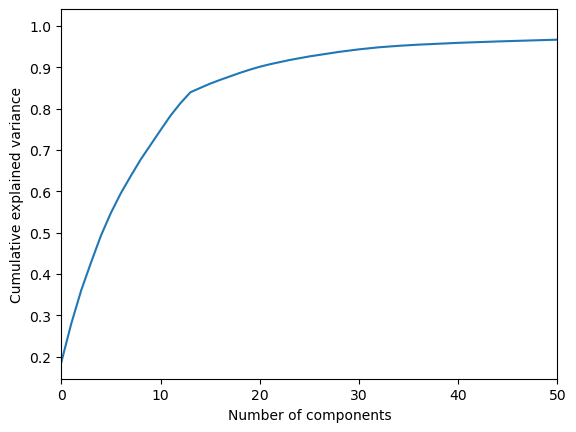

In [513]:
pca = PCA().fit(X)  # fit without specifying n_components
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = explained_variance_ratio.cumsum()
print(cumulative_variance)

# Plot cumulative variance to find 'elbow'
import matplotlib.pyplot as plt
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xlim(0, 50)
plt.show()

In [555]:
pca = PCA(n_components=20)  # pick number of components based on explained variance or a fixed number
X_pca = pca.fit_transform(X)

# Optional: Check explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.19384314 0.29012608 0.37331852 0.44367294 0.51070454 0.56722623
 0.61631133 0.65921999 0.70067651 0.73760163 0.77401989 0.81003076
 0.84125415 0.86854079 0.87953605 0.89010202 0.89934914 0.9081792
 0.91686258 0.92473153]


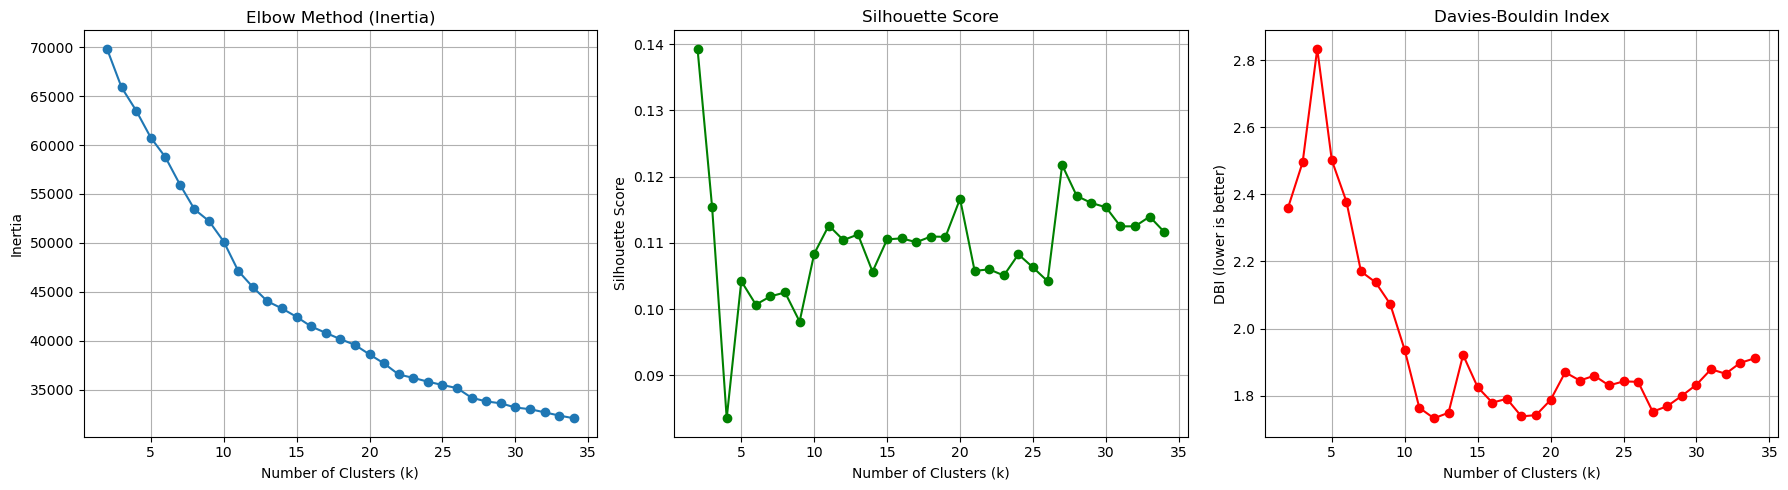

In [540]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
silhouette_scores = []
davies_bouldin_scores = []

k_range = range(2, 35)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

# Plot all metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Elbow Method (Inertia)
axs[0].plot(k_range, inertia, marker='o')
axs[0].set_title('Elbow Method (Inertia)')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

# Silhouette Score
axs[1].plot(k_range, silhouette_scores, marker='o', color='green')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

# Davies-Bouldin Index
axs[2].plot(k_range, davies_bouldin_scores, marker='o', color='red')
axs[2].set_title('Davies-Bouldin Index')
axs[2].set_xlabel('Number of Clusters (k)')
axs[2].set_ylabel('DBI (lower is better)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [556]:
optimal_k = 20
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['kmeans_cluster'] = kmeans.fit_predict(X)

In [557]:
cluster_counts = X['kmeans_cluster'].value_counts().reset_index()
cluster_counts.columns = ['kmeans_cluster', 'count']
print(cluster_counts)

    kmeans_cluster  count
0                2    323
1               13    278
2                8    254
3                7    235
4               14    211
5                1    186
6                5    185
7               16    166
8               12    147
9               11    140
10              18    138
11              17    137
12              19    121
13               0    119
14              15     99
15               4     98
16               3     96
17               9     62
18              10      3
19               6      2


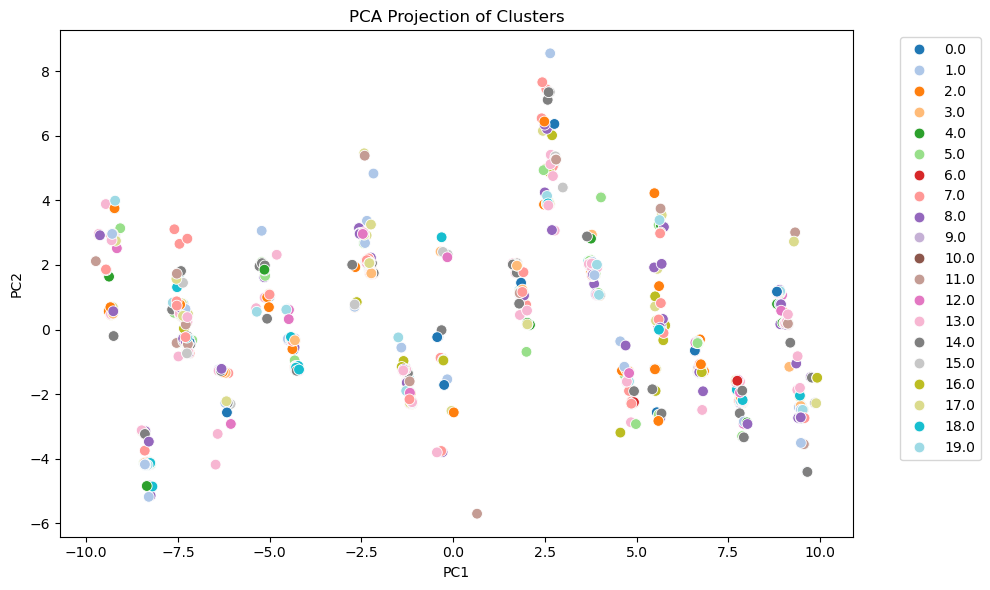

In [558]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=2)
X_pca_viz = pca.fit_transform(X)

# Add cluster labels if not already added
X['cluster'] = kmeans.labels_

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca_viz, columns=['PC1', 'PC2'])
pca_df['cluster'] = X['cluster']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab20', s=60)
plt.title('PCA Projection of Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

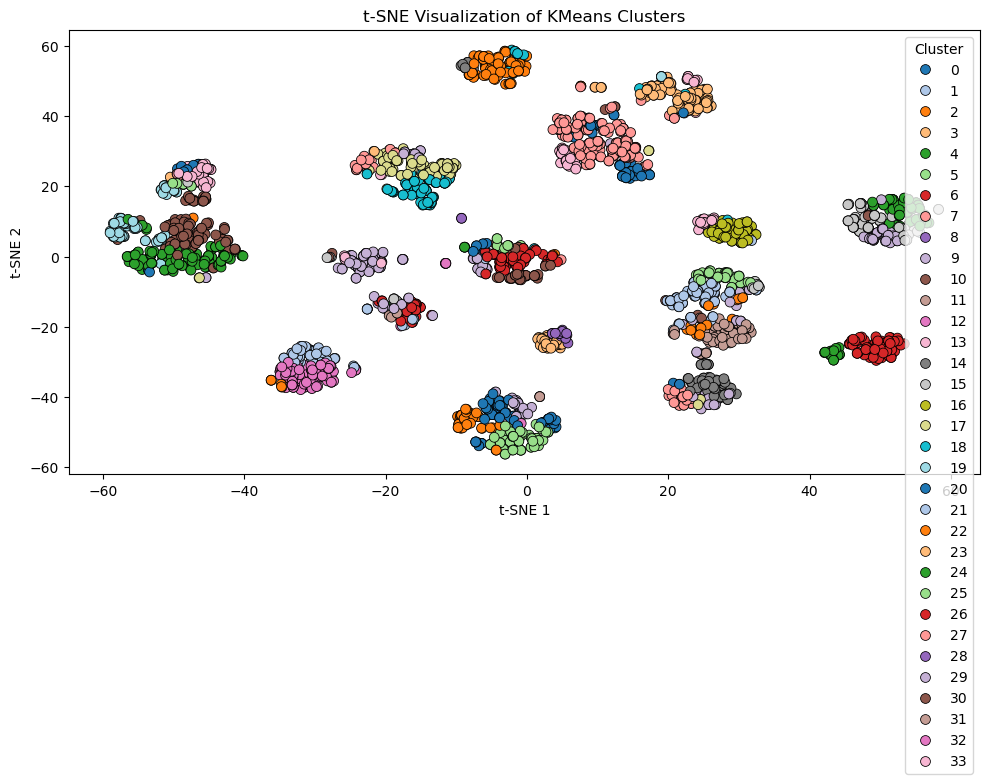

In [562]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='tab20', s=50, edgecolor='k')
plt.title("t-SNE Visualization of KMeans Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [563]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, X['cluster'])
print(f'Overall Silhouette Score: {sil_score:.4f}')

Overall Silhouette Score: 0.2583


In [560]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, X['cluster'])

# Aggregate by cluster
X['silhouette'] = sample_silhouette_values
cluster_silhouette_scores = X.groupby('cluster')['silhouette'].mean().sort_values(ascending=False)

print("Silhouette Score by Cluster:")
print(cluster_silhouette_scores)

Silhouette Score by Cluster:
cluster
10    0.944034
6     0.837760
8     0.345795
9     0.307956
1     0.303911
14    0.303246
19    0.282071
5     0.279045
11    0.273076
0     0.268428
13    0.265671
3     0.265100
7     0.254534
2     0.251821
16    0.217204
18    0.185024
17    0.179824
12    0.179608
4     0.176115
15    0.170217
Name: silhouette, dtype: float64


In [547]:
from sklearn.metrics import pairwise_distances_argmin_min

# Get closest indices to centroids
closest_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

# Grab the original (unscaled) rows that are closest to each centroid
representative_rows = X.iloc[closest_indices]

print(representative_rows)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 94 while Y.shape[1] == 97

In [395]:
# DBSCAN clustering

from sklearn.preprocessing import StandardScaler

X = formations.copy()
X['personnel'] = X['personnel'].replace('Other', '99')

X[boolean_features] = X[boolean_features].astype(int)
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

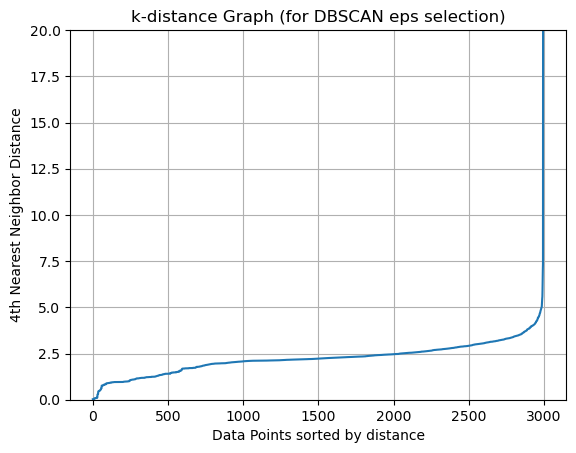

In [524]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

# Sort and plot the distances
distances = np.sort(distances[:, 4])  # 4 because n_neighbors=5
plt.plot(distances)
plt.title("k-distance Graph (for DBSCAN eps selection)")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.ylim(0, 20)
plt.show()

In [525]:
from sklearn.cluster import DBSCAN

for min_pts in range(3, 30):
    db = DBSCAN(eps=4.5, min_samples=min_pts).fit(X_pca)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = sum(labels == -1)
    print(f"min_samples={min_pts}: clusters={n_clusters}, noise points={n_noise}")

min_samples=3: clusters=5, noise points=9
min_samples=4: clusters=4, noise points=13
min_samples=5: clusters=4, noise points=13
min_samples=6: clusters=3, noise points=19
min_samples=7: clusters=3, noise points=19
min_samples=8: clusters=3, noise points=19
min_samples=9: clusters=3, noise points=21
min_samples=10: clusters=2, noise points=30
min_samples=11: clusters=2, noise points=31
min_samples=12: clusters=2, noise points=31
min_samples=13: clusters=2, noise points=32
min_samples=14: clusters=2, noise points=32
min_samples=15: clusters=2, noise points=32
min_samples=16: clusters=2, noise points=38
min_samples=17: clusters=2, noise points=38
min_samples=18: clusters=2, noise points=38
min_samples=19: clusters=2, noise points=41
min_samples=20: clusters=2, noise points=42
min_samples=21: clusters=2, noise points=43
min_samples=22: clusters=2, noise points=43
min_samples=23: clusters=2, noise points=43
min_samples=24: clusters=2, noise points=44
min_samples=25: clusters=2, noise points

In [526]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=4.5, min_samples=3)
dbscan.fit(X_pca)

X['cluster'] = dbscan.labels_

In [527]:
cluster_counts = X['cluster'].value_counts().sort_index()
print("Cluster counts:")
print(cluster_counts)

Cluster counts:
cluster
-1       9
 0    2913
 1       3
 2      60
 3       5
 4      10
Name: count, dtype: int64


In [23]:
# Ensure scaled data has the same index
X_scaled_df = pd.DataFrame(X_scaled, index=X.index)

repr_rows = []

for cluster_id in sorted(X['cluster'].unique()):
    if cluster_id == -1:
        continue

    cluster_indices = X[X['cluster'] == cluster_id].index
    cluster_scaled = X_scaled_df.loc[cluster_indices]

    centroid = cluster_scaled.mean().values

    distances = np.linalg.norm(cluster_scaled.values - centroid, axis=1)
    closest_idx = distances.argmin()
    repr_row = X.loc[cluster_scaled.index[closest_idx]]

    repr_rows.append(repr_row)

representative_df = pd.DataFrame(repr_rows)
print("\nRepresentative rows (one per cluster):")
print(representative_df)


Representative rows (one per cluster):
       qb   rb   wr   te   ol  shotgun  backFormation  receiverFormation  \
106   1.0  1.0  3.0  1.0  5.0      1.0           21.0               10.0   
7904  2.0  1.0  2.0  1.0  5.0      1.0           21.0               10.0   
8218  0.0  0.0  0.0  0.0  0.0      1.0           37.0               14.0   
8589  0.0  1.0  3.0  2.0  5.0      1.0           32.0               10.0   

      wide_left  slot_left  tight_left  tight_right  slot_right  wide_right  \
106         1.0        1.0         0.0          1.0         0.0         1.0   
7904        1.0        1.0         0.0          1.0         1.0         0.0   
8218        0.0        0.0         0.0          0.0         0.0         0.0   
8589        1.0        1.0         1.0          1.0         0.0         1.0   

      cluster  
106       0.0  
7904      1.0  
8218      2.0  
8589      3.0  


In [163]:
from sklearn.cluster import DBSCAN
import gower

X = formations.copy()

# 2. Convert boolean columns to int (if any)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# 3. Specify categorical columns (your engineered features too)
categorical_cols = ['shotgun', 'backFormation', 'receiverFormation', 'personnel', 'qb', 'hash',
    'wr_motion',
    'rb_motion',
    'te_motion']

# Create a boolean mask with True for categorical columns, False otherwise
cat_mask = np.zeros(X.shape[1], dtype=bool)
for col in categorical_cols:
    cat_mask[X.columns.get_loc(col)] = True

# Now call gower_matrix with this boolean mask
gower_dist = gower.gower_matrix(X, cat_features=cat_mask)

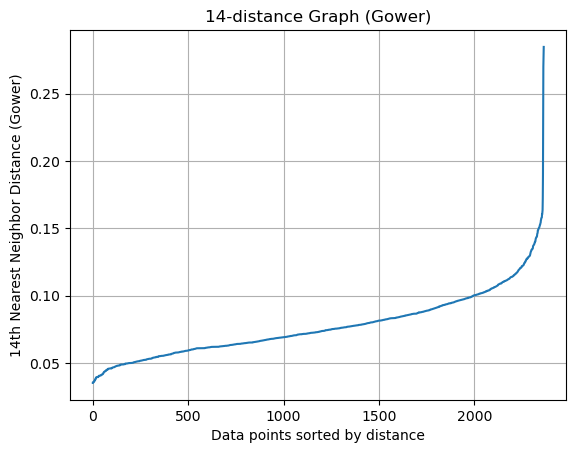

In [168]:
k = 14  # 4th nearest neighbor (excluding self)
sorted_gower = np.sort(gower_dist, axis=1)
k_distances = sorted_gower[:, k]  # get k-th nearest distance for each row

k_distances = np.sort(k_distances)
plt.plot(k_distances)
plt.title(f"{k}-distance Graph (Gower)")
plt.xlabel("Data points sorted by distance")
plt.ylabel(f"{k}th Nearest Neighbor Distance (Gower)")
plt.grid(True)
plt.show()

In [169]:
from sklearn.cluster import DBSCAN

gower_dist = gower.gower_matrix(X) 

for min_pts in range(3, 16):
    db = DBSCAN(eps=0.13, min_samples=min_pts, metric='precomputed').fit(gower_dist)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = sum(labels == -1)
    print(f"min_samples={min_pts}: clusters={n_clusters}, noise points={n_noise}")

min_samples=3: clusters=2, noise points=1
min_samples=4: clusters=2, noise points=1
min_samples=5: clusters=1, noise points=5
min_samples=6: clusters=1, noise points=5
min_samples=7: clusters=1, noise points=5
min_samples=8: clusters=1, noise points=5
min_samples=9: clusters=1, noise points=5
min_samples=10: clusters=1, noise points=5
min_samples=11: clusters=1, noise points=5
min_samples=12: clusters=1, noise points=5
min_samples=13: clusters=1, noise points=5
min_samples=14: clusters=1, noise points=5
min_samples=15: clusters=1, noise points=5


In [167]:
# 5. Fit DBSCAN with precomputed Gower distance
dbscan = DBSCAN(eps=0.13, min_samples=15, metric='precomputed')
clusters = dbscan.fit_predict(gower_dist)

# 6. Add cluster labels to DataFrame
X['cluster'] = clusters

# 7. Check cluster counts
print(X['cluster'].value_counts())

cluster
 0    2358
-1       6
Name: count, dtype: int64


In [567]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler

# Copy data
#X = formations.copy()

# Replace 'Other' in personnel with '99' as string (categorical)
#X['personnel'] = X['personnel'].replace('Other', '99').astype(str)

# Boolean columns to int
#X[boolean_features] = X[boolean_features].astype(int)

# Identify categorical columns (including personnel and any other categorical features)
#categorical_cols = categorical_features  # make sure categorical_features are strings/categorical dtype
# Remove any categorical features that may have been one-hot encoded previously or are numeric

# Scale numerical features only
#scaler = StandardScaler()
#X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

# Ensure categorical columns are of type 'object' or 'category'
for col in categorical_cols:
    X[col] = X[col].astype(str)

# Prepare data for K-Prototypes: it expects a numpy array
X_matrix = X.to_numpy()

# Get indices of categorical columns (required by K-Prototypes)
cat_col_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Initialize and fit K-Prototypes
kproto = KPrototypes(n_clusters=20, init='Cao', random_state=42)
clusters = kproto.fit_predict(X_matrix, categorical=cat_col_indices)

# Add cluster labels back to dataframe
X['cluster'] = clusters

print(X['cluster'].value_counts())

cluster
16    350
18    233
8     223
12    221
14    207
9     191
17    189
13    189
6     176
0     175
1     160
7     157
10    154
5     129
4     103
11     71
3      62
15      5
19      3
2       2
Name: count, dtype: int64


In [480]:
print(X.shape)
print(X.isnull().sum().sum())  # total NaNs
print(X.duplicated().sum())    # duplicates
print(X[categorical_cols].dtypes)
print(X[features_to_scale].dtypes)

(3000, 38)
0
0
backFormation        object
receiverFormation    object
hash                 object
personnel            object
dtype: object
qb                         float64
rb                         float64
te                         float64
wr                         float64
ol                         float64
wide_left                  float64
slot_left                  float64
tight_left                 float64
tight_right                float64
slot_right                 float64
wide_right                 float64
receivers_on_short_side    float64
spread_index               float64
te_spread_index            float64
rb_spread_index            float64
heavy_index                float64
te_heavy_index             float64
tight_balance              float64
spread_balance             float64
motion_load                float64
motion_heaviness_ratio     float64
motion_spread_ratio        float64
field_mismatch             float64
dtype: object


In [569]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, X['cluster'])
print(f'Overall Silhouette Score: {sil_score:.4f}')

Overall Silhouette Score: 0.0220


In [568]:
gower_dist = gower.gower_matrix(X)

# 4. Calculate silhouette score with precomputed distances
sil_score = silhouette_score(gower_dist, clusters, metric='precomputed')

print(f'Silhouette score (using Gower distance): {sil_score:.3f}')

Silhouette score (using Gower distance): 0.120


In [570]:
from sklearn.metrics import silhouette_samples

# silhouette_samples gives a silhouette score for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create a DataFrame for convenience
sil_df = pd.DataFrame({
    'cluster': cluster_labels,
    'silhouette': sample_silhouette_values
})

# Calculate average silhouette score per cluster
cluster_silhouette_scores = sil_df.groupby('cluster')['silhouette'].mean()

print("Silhouette score per cluster:")
print(cluster_silhouette_scores)

ValueError: Found input variables with inconsistent numbers of samples: [2364, 3000]

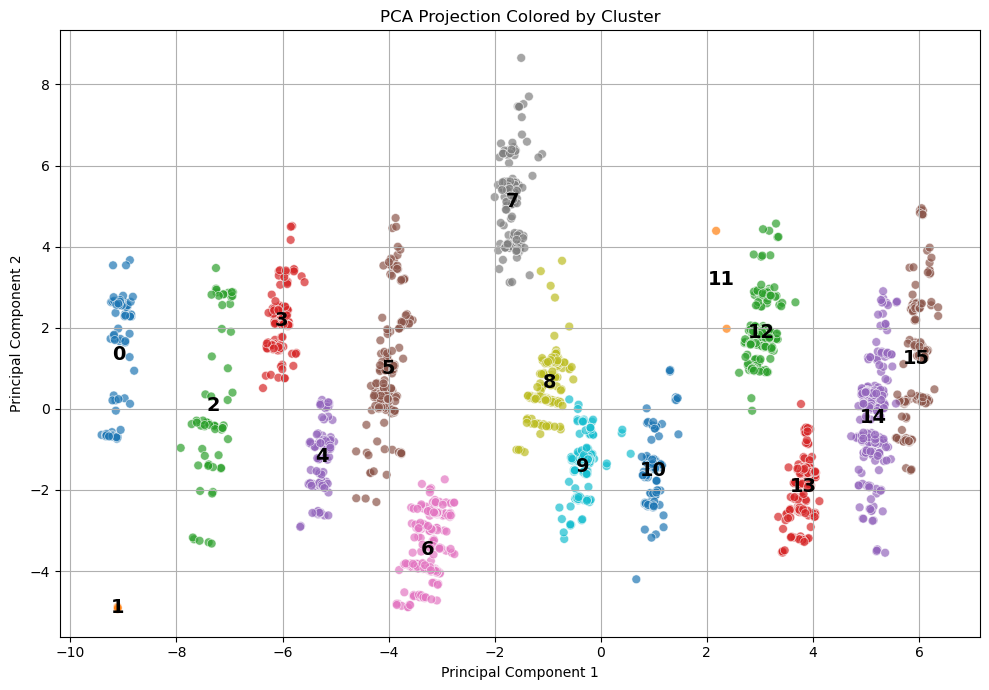

In [483]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# One-hot encode categorical columns automatically
X_encoded = pd.get_dummies(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Prepare for plotting
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['cluster'] = clusters  # Make sure `clusters` is defined

# Get cluster centers
cluster_centers = plot_df.groupby('cluster')[['PC1', 'PC2']].mean()

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=40, alpha=0.7, legend=False)

# Add cluster labels
for cluster_id, (x, y) in cluster_centers.iterrows():
    plt.text(x, y, str(cluster_id), fontsize=14, weight='bold', color='black', ha='center', va='center')

plt.title('PCA Projection Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
formations['kproto_cluster'] = clusters

In [148]:
formations.to_csv('kproto_clustered_formations.csv', index=True)

In [153]:
# Ensure categorical_centroids are strings (not ints)
categorical_centroids = centroids[:, num_numerical:].astype(str)

# Distance function (K-Prototypes style)
def mixed_distance(row, numeric_centroid, categorical_centroid, categorical_indices, gamma):
    numeric_indices = np.setdiff1d(range(len(row)), categorical_indices)
    numeric_dist = np.sum((row[numeric_indices].astype(float) - numeric_centroid) ** 2)
    cat_dist = np.sum(row[categorical_indices].astype(str) != categorical_centroid)
    return numeric_dist + gamma * cat_dist

# Find representative rows
representative_indices = []

for cluster_label in range(kproto.n_clusters):
    cluster_points_idx = np.where(clusters == cluster_label)[0]
    cluster_points = X_matrix[cluster_points_idx]

    num_cent = numeric_centroids[cluster_label]
    cat_cent = categorical_centroids[cluster_label]

    distances = [
        mixed_distance(row, num_cent, cat_cent, categorical_indices, kproto.gamma)
        for row in cluster_points
    ]

    closest_idx = cluster_points_idx[np.argmin(distances)]
    representative_indices.append(closest_idx)

representative_rows = formations.iloc[representative_indices]

In [154]:
representative_rows = representative_rows.sort_values(by='kproto_cluster')

# Then map the descriptive columns
representative_rows["backFormation_desc"] = representative_rows["backFormation"].map(back_formations)
representative_rows["receiverFormation_desc"] = representative_rows["receiverFormation"].map(receiver_formations)

# Reorder columns (optional)
cols = representative_rows.columns.tolist()

for original, desc in [("backFormation", "backFormation_desc"), ("receiverFormation", "receiverFormation_desc")]:
    if desc in cols:
        cols.insert(cols.index(original) + 1, cols.pop(cols.index(desc)))

representative_rows = representative_rows[cols]

print(representative_rows)

      qb  rb  wr  te  ol  shotgun  backFormation      backFormation_desc  \
875    1   1   3   1   5     True             28  RB Left - Sniffer Left   
7185   1   1   2   2   5     True             21         Gun Offset Left   
2321   1   1   3   1   5     True             26     Pistol 2-Back Right   
8960   1   2   2   1   5    False             37                No Video   
5484   1   2   2   1   5     True             11                  Pistol   
352    1   1   2   2   5     True             11                  Pistol   
574    1   1   2   2   5     True             21         Gun Offset Left   
93     1   1   3   1   5     True             22        Gun Offset Right   
509    1   1   3   1   5     True             11                  Pistol   
441    1   1   2   2   5     True             22        Gun Offset Right   
999    1   1   2   2   5     True             11                  Pistol   
6756   1   2   1   2   5     True             38              Kneel Down   
31     1   1

In [33]:
representative_rows.to_csv('kproto_rep_rows.csv', index=True)

In [195]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy import stats

# 1. Copy and prep the dataset
X = formations.copy()

# 2. Convert boolean columns to integers
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# 3. Encode object (categorical) columns using OrdinalEncoder
categorical_cols = X.select_dtypes(include='object').columns.tolist()
if categorical_cols:
    enc = OrdinalEncoder()
    X[categorical_cols] = enc.fit_transform(X[categorical_cols])

# 4. Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Perform hierarchical clustering
n_clusters = 15
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = model.fit_predict(X_scaled)
X['cluster'] = cluster_labels

# 6. Print value counts for each cluster
print("Cluster sizes:")
print(X['cluster'].value_counts().sort_index())
print()

# 7. Identify categorical indices (based on column names)
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# 8. Define mixed distance function
def mixed_distance(row, numeric_centroid, categorical_centroid, categorical_indices, gamma=1):
    numeric_indices = np.setdiff1d(np.arange(len(row)), categorical_indices)
    numeric_dist = np.sum((row[numeric_indices].astype(float) - numeric_centroid) ** 2)
    cat_dist = np.sum(row[categorical_indices] != categorical_centroid)
    return numeric_dist + gamma * cat_dist

# 9. Get representative rows for each cluster
X_matrix = X.drop(columns='cluster').to_numpy()
representative_indices = []

for c in np.unique(cluster_labels):
    cluster_points_idx = np.where(cluster_labels == c)[0]
    cluster_points = X_matrix[cluster_points_idx]

    numeric_indices = np.setdiff1d(np.arange(X_matrix.shape[1]), categorical_indices)
    numeric_centroid = cluster_points[:, numeric_indices].astype(float).mean(axis=0)

    categorical_centroid = []
    for cat_idx in categorical_indices:
        mode_val = stats.mode(cluster_points[:, cat_idx], keepdims=True)[0][0]
        categorical_centroid.append(mode_val)
    categorical_centroid = np.array(categorical_centroid)

    distances = [mixed_distance(row, numeric_centroid, categorical_centroid, categorical_indices)
                 for row in cluster_points]

    closest_idx = cluster_points_idx[np.argmin(distances)]
    representative_indices.append(closest_idx)

# 10. Show representative rows from the original `formations` dataframe
representative_rows = formations.iloc[representative_indices]
representative_rows['cluster'] = np.unique(cluster_labels)  # add cluster label
print("Representative rows:")
print(representative_rows)

Cluster sizes:
cluster
0     348
1      95
2     313
3     213
4     172
5     316
6     128
7     103
8      59
9      44
10    166
11      4
12    161
13    199
14     43
Name: count, dtype: int64

Representative rows:
       qb  rb  wr  te  ol  shotgun  backFormation  receiverFormation  \
675     1   1   3   1   5     True             21                 10   
3211    1   1   2   1   6     True             11                 10   
9102    1   2   2   1   5    False             18                 11   
1300    1   1   3   1   5     True             21                 10   
2297    1   2   1   2   5     True             11                 10   
2026    1   1   2   2   5     True             21                 10   
5197    1   1   3   1   5     True              1                 10   
3322    1   1   3   1   5     True             21                  8   
7904    2   1   2   1   5     True             21                 10   
10126   1   0   4   1   5     True             11          

C:\Users\lehma\AppData\Local\Temp\ipykernel_29652\1860653386.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  representative_rows['cluster'] = np.unique(cluster_labels)  # add cluster label


In [196]:
representative_rows.to_csv('hierarchical_rep_rows.csv', index=True)

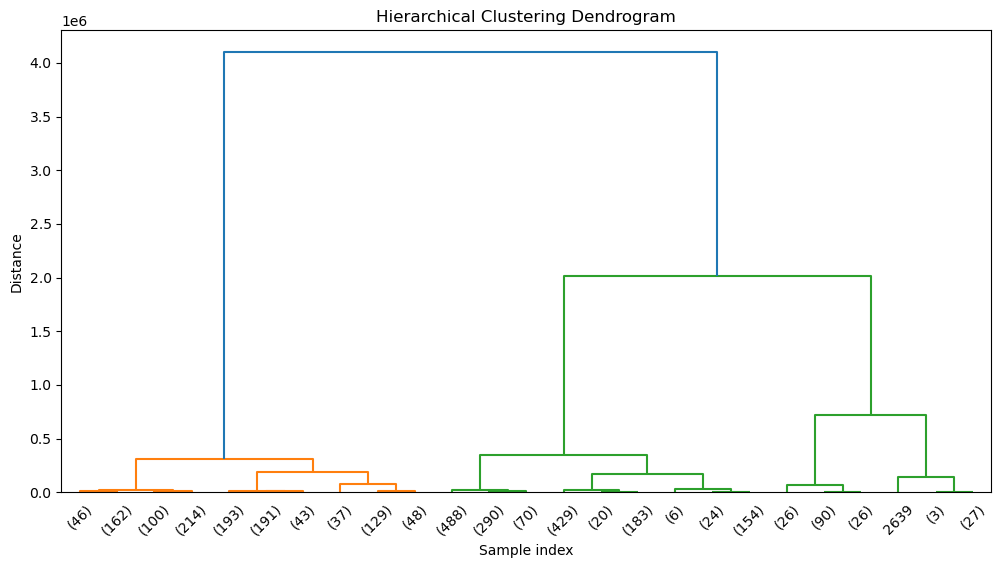

In [385]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=25)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [198]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score using standardized features and cluster labels
score = silhouette_score(X_scaled, cluster_labels)

print(f"\nSilhouette Score: {score:.3f}")


Silhouette Score: 0.111


In [202]:
from sklearn.metrics import silhouette_samples

# silhouette_samples gives a silhouette score for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create a DataFrame for convenience
sil_df = pd.DataFrame({
    'cluster': cluster_labels,
    'silhouette': sample_silhouette_values
})

# Calculate average silhouette score per cluster
cluster_silhouette_scores = sil_df.groupby('cluster')['silhouette'].mean()

print("Silhouette score per cluster:")
print(cluster_silhouette_scores)

Silhouette score per cluster:
cluster
0     0.024838
1     0.083365
2     0.074260
3     0.130082
4     0.105529
5     0.095775
6     0.128148
7     0.112553
8     0.286806
9     0.405159
10    0.165215
11    0.881689
12    0.095062
13    0.134525
14    0.253080
Name: silhouette, dtype: float64


### Hierarchical Clustering

In [207]:
import numpy as np
import pandas as pd
import gower
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import scipy.stats as stats

# 1. Copy formations to X
X = formations.copy()

# 2. Convert booleans to int (important for Gower distance)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [531]:
# 3. Compute Gower distance matrix for mixed data
gower_dist = gower.gower_matrix(X_pca)

C:\Users\lehma\AppData\Local\Temp\ipykernel_29652\3975894814.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='ward')


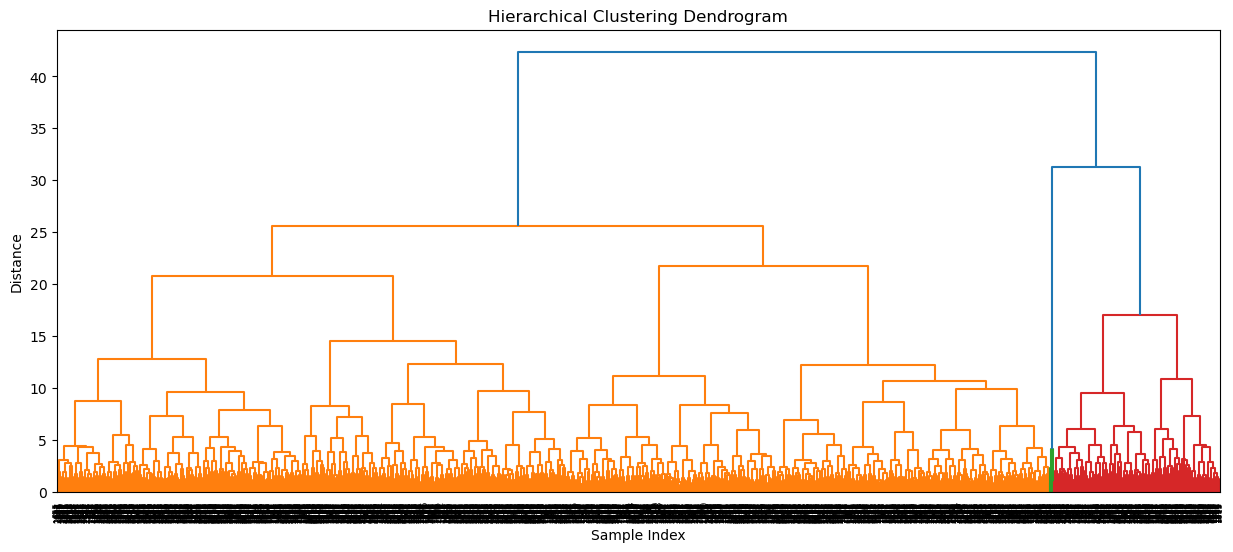

In [532]:
# 4. Perform hierarchical clustering using Ward linkage on Gower distances
Z = linkage(gower_dist, method='ward')

# 5. Plot dendrogram
plt.figure(figsize=(15, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Clusters: 2, Silhouette Score: 0.164
Clusters: 3, Silhouette Score: 0.154
Clusters: 4, Silhouette Score: 0.035
Clusters: 5, Silhouette Score: 0.011
Clusters: 6, Silhouette Score: 0.037
Clusters: 7, Silhouette Score: 0.054
Clusters: 8, Silhouette Score: 0.060
Clusters: 9, Silhouette Score: 0.056
Clusters: 10, Silhouette Score: 0.057
Clusters: 11, Silhouette Score: 0.050
Clusters: 12, Silhouette Score: 0.039
Clusters: 13, Silhouette Score: 0.047
Clusters: 14, Silhouette Score: 0.045
Clusters: 15, Silhouette Score: 0.044
Clusters: 16, Silhouette Score: 0.050
Clusters: 17, Silhouette Score: 0.057
Clusters: 18, Silhouette Score: 0.053
Clusters: 19, Silhouette Score: 0.051
Clusters: 20, Silhouette Score: 0.043
Clusters: 21, Silhouette Score: 0.046
Clusters: 22, Silhouette Score: 0.040
Clusters: 23, Silhouette Score: 0.042
Clusters: 24, Silhouette Score: 0.045
Clusters: 25, Silhouette Score: 0.047
Clusters: 26, Silhouette Score: 0.049
Clusters: 27, Silhouette Score: 0.048
Clusters: 28, Silhou

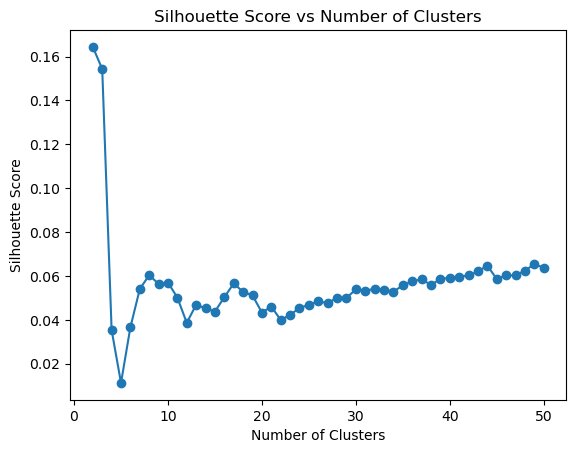

In [533]:
sil_scores = []
cluster_range = range(2, 51)  # test clusters from 2 to 20

for n_clusters in cluster_range:
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(gower_dist, cluster_labels, metric='precomputed')
    sil_scores.append(score)
    print(f"Clusters: {n_clusters}, Silhouette Score: {score:.3f}")

# Optional: Plot silhouette score vs number of clusters
plt.figure()
plt.plot(cluster_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [407]:
best_k = 5
cluster_labels = fcluster(Z, best_k, criterion='maxclust')

# Add cluster labels to the DataFrame
X['cluster'] = cluster_labels

In [225]:
df = pd.DataFrame(X)
df.to_csv('formations_clustered.csv', index=False)

In [221]:
def cluster_centroid(X_cluster):
    # Calculate numeric mean and categorical mode centroid for mixed data
    numeric_cols = X.select_dtypes(include=[np.number]).columns.drop('cluster', errors='ignore')
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns

    # Numeric centroid = mean
    numeric_centroid = X_cluster[numeric_cols].mean().values

    # Categorical centroid = mode
    categorical_centroid = []
    for col in categorical_cols:
        mode_val = X_cluster[col].mode().iloc[0]
        categorical_centroid.append(mode_val)

    return numeric_centroid, categorical_centroid

def mixed_distance(row, numeric_centroid, categorical_centroid, numeric_cols, categorical_cols, gamma=1):
    # Distance is sum squared numeric difference + gamma * categorical difference count
    numeric_diff = np.sum((row[numeric_cols] - numeric_centroid) ** 2)
    cat_diff = np.sum(row[categorical_cols].values != categorical_centroid)
    return numeric_diff + gamma * cat_diff

numeric_cols = X.select_dtypes(include=[np.number]).columns.drop('cluster', errors='ignore')
categorical_cols = X.select_dtypes(exclude=[np.number]).columns

representative_indices = []
representative_clusters = []

for c in np.unique(cluster_labels):
    cluster_points = X[X['cluster'] == c]

    numeric_centroid, categorical_centroid = cluster_centroid(cluster_points)

    distances = cluster_points.apply(
        lambda row: mixed_distance(row, numeric_centroid, categorical_centroid, numeric_cols, categorical_cols, gamma=1),
        axis=1
    )

    # Get index of the closest row
    representative_idx = distances.idxmin()
    representative_indices.append(representative_idx)
    representative_clusters.append(c)  # Store cluster ID

# Representative rows from each cluster
representative_rows = formations.loc[representative_indices].copy()
representative_rows['cluster'] = representative_clusters  # Add cluster ID

print("Representative rows for each cluster:")
print(representative_rows)

Representative rows for each cluster:
       qb  rb  wr  te  ol  shotgun  backFormation  receiverFormation  \
9035    1   3   1   1   5    False             18                 10   
3823    0   0   0   0   0    False             37                 11   
9011    1   3   1   1   5    False             18                 11   
10403   1   1   1   3   5     True             21                  2   
8458    1   2   1   2   5    False              7                  2   
7112    1   2   1   2   5     True             22                 10   
2377    1   3   2   0   5    False             18                 10   
6341    1   2   2   1   5     True             21                 11   
5949    1   2   2   1   5    False              7                 10   
4517    1   1   2   2   5    False              7                 10   
6329    1   2   2   1   5    False              7                 11   
446     1   1   2   2   5    False              7                 10   
9515    1   1   3   1   5 

In [222]:
representative_rows = representative_rows.sort_values(by='cluster')

# Then map the descriptive columns
representative_rows["backFormation_desc"] = representative_rows["backFormation"].map(back_formations)
representative_rows["receiverFormation_desc"] = representative_rows["receiverFormation"].map(receiver_formations)

# Reorder columns (optional)
cols = representative_rows.columns.tolist()

for original, desc in [("backFormation", "backFormation_desc"), ("receiverFormation", "receiverFormation_desc")]:
    if desc in cols:
        cols.insert(cols.index(original) + 1, cols.pop(cols.index(desc)))

representative_rows = representative_rows[cols]

print(representative_rows)

       qb  rb  wr  te  ol  shotgun  backFormation backFormation_desc  \
9035    1   3   1   1   5    False             18         Wing Right   
3823    0   0   0   0   0    False             37           No Video   
9011    1   3   1   1   5    False             18         Wing Right   
10403   1   1   1   3   5     True             21    Gun Offset Left   
8458    1   2   1   2   5    False              7        Single Back   
7112    1   2   1   2   5     True             22   Gun Offset Right   
2377    1   3   2   0   5    False             18         Wing Right   
6341    1   2   2   1   5     True             21    Gun Offset Left   
5949    1   2   2   1   5    False              7        Single Back   
4517    1   1   2   2   5    False              7        Single Back   
6329    1   2   2   1   5    False              7        Single Back   
446     1   1   2   2   5    False              7        Single Back   
9515    1   1   3   1   5    False              7        Single 

In [223]:
representative_rows.to_csv('hierarchical_rep_rows.csv', index=True)

In [219]:
print(X['cluster'].value_counts().sort_values(ascending=False))

cluster
29    202
37    179
33    120
18    117
27    110
30    105
1      91
26     75
28     75
36     73
14     66
13     65
7      63
24     63
21     62
34     61
16     60
12     60
9      56
32     55
23     51
15     50
31     50
20     48
35     44
17     43
4      38
22     36
19     34
8      33
10     33
6      33
11     33
3      29
25     25
5      22
2       4
Name: count, dtype: int64


## HDBSCAN clustering

C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\l

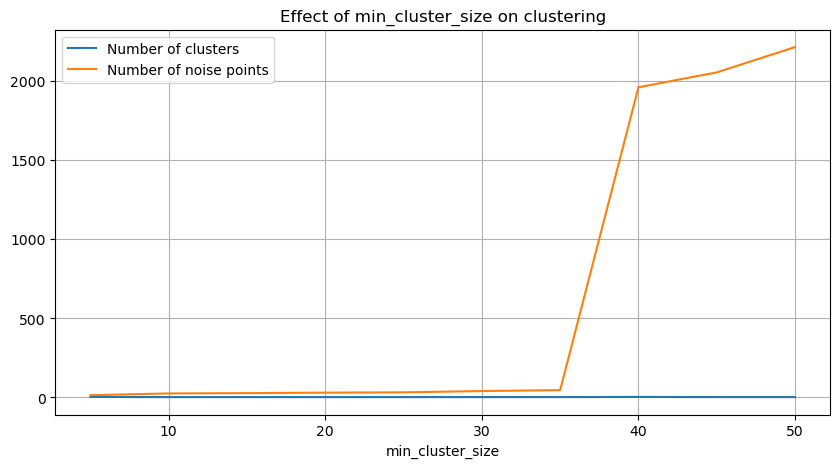

In [534]:
import hdbscan
import matplotlib.pyplot as plt

results = []

for size in range(5, 51, 5):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=size)
    labels = clusterer.fit_predict(X_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    results.append((size, n_clusters, n_noise))

# Plot
sizes, clusters, noise = zip(*results)
plt.figure(figsize=(10, 5))
plt.plot(sizes, clusters, label='Number of clusters')
plt.plot(sizes, noise, label='Number of noise points')
plt.xlabel('min_cluster_size')
plt.legend()
plt.title('Effect of min_cluster_size on clustering')
plt.grid(True)
plt.show()

In [535]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
clusterer.fit(X_pca)

# View persistence of each cluster
print(clusterer.cluster_persistence_)

[0.04403604 0.29483769]


C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [536]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=21)
clusters = clusterer.fit_predict(X_pca)
X['cluster'] = clusters
print(X['cluster'].value_counts())

cluster
 1    2912
 0      57
-1      31
Name: count, dtype: int64


C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\lehma\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
